# <font color="red">EMT for EPANET-MSX</font>

### Table of contents
  - Initialize EPANET-MATLAB Toolkit
  - Multi-species chemical reactions 

## Initialize EPANET Python Toolkit (EPyT)
#### You should always begin with this command to import the toolkit

In [25]:
from epyt import epanet

#### Load a benchmark network
Decide which benchmark network to use and load the network

In [26]:
# decide which network to load from the "/networks/" folder  
filename = 'net2-cl2.inp'   # you can also try 'net2-cl2.inp', 'Net3.inp', etc.
 
# call epanet class and load all data and functions in G structure
G = epanet(filename)

EPANET version 20200 loaded (EPyT version 1.1.6).
Input File net2-cl2.inp loaded successfully.



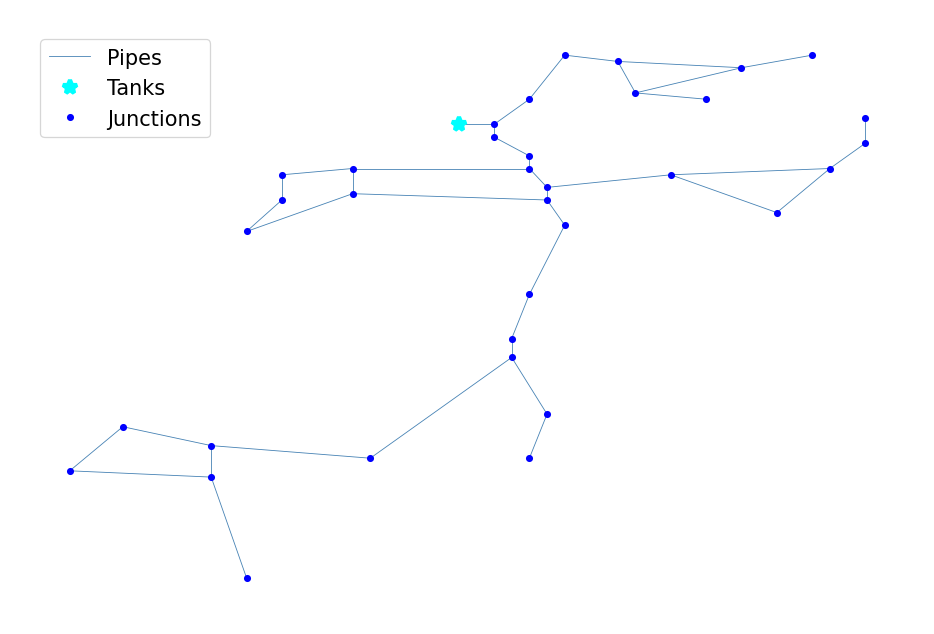

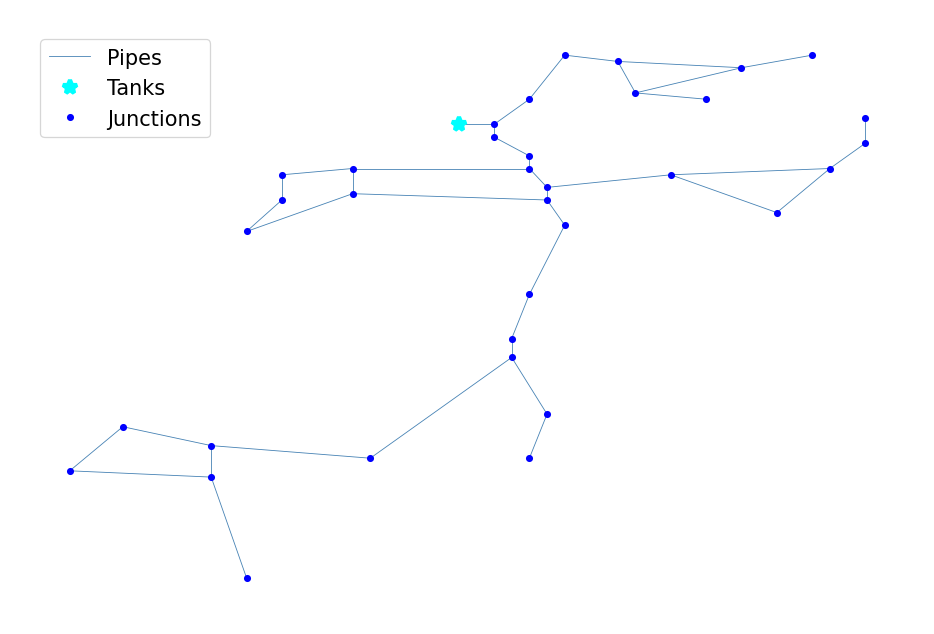

In [27]:
G.plot()

#### Multi-species chemical reactions
![Alt text](images/im1.png)




Reactions in water can be described using a set of Differential Algebraic Equations (DAE):  
<br>
$ \frac{dx_b}{dt} = f(x_b,x_s,z_b,z_s) $   <br> <br>
$ \frac{dx_s}{dt} = g(x_b,x_s,z_b,z_s) $   <br>   <br>
$ 0 = h(x_b,x_s,z_b,z_s) $   

These equations describe most of the reactions in water distribution systems. The solution methodology follows the following steps:
  - Split the pipes into segments
  - Solve the reaction equations for each segment
  - Compute the advection (movement based on flows)
  - Mix the bulk concentrations with the pipe wall concentrations 
  - Recompute segmens

![Alt Text](images/im2.png)

The set of diferential equations can be solved using an explicit method, e.g. Runge-Kutta or Forward Euler method.
#### Chlorine reactions
![Alt text](images/im3.png)

The most standard assumption is that Free Chlorine concentration is linear, i.e,  

$ \frac{dC(t)}{dt} = -k_bC(t) $ <br>
Where $ C(t) $ is the free chlorine concentration measured in $ mg/L $

In [28]:
# Example MSX file
with open('net2-cl2.msx', 'r') as fid:
    content = fid.read()
    print(content)

[TITLE]
NET2 Chlorine Example


[OPTIONS]
AREA_UNITS  FT2
RATE_UNITS  DAY
SOLVER      EUL
TIMESTEP    300
RTOL        0.001
ATOL        0.001


[SPECIES]
BULK        CL2    MG  0.01 0.001


[COEFFICIENTS]
PARAMETER   Kb     0.3
PARAMETER   Kw     1.0


[TERMS]
Kf     1.5826e-4 * RE^0.88 / D

[PIPE]
RATE        CL2    -Kb*CL2 - (4/D)*Kw*Kf/(Kw+Kf)*CL2


[TANK]
RATE        CL2    -Kb*CL2


[SOURCES]
;CONC/MASS/FLOW/SETPOINT   <nodeID>      <specieID>     <strength>     (<tseriesID>)
CONC                          1             CL2           0.8


[QUALITY]
GLOBAL          CL2   0.5
NODE      26    CL2   0.1

[PARAMETERS]
;PIPE        <pipeID>      <paramID>     <value>
;TANK        <tankID>      <paramID>     <value>

[REPORT]
NODES  2  20  23  26
SPECIE CL2 YES



#### How to load an MSX file

In [29]:
# Load EPANET-MSX file
G.loadMSXFile('net2-cl2.msx')   # Load MSX file with reactions
qual_res_MSX = G.getMSXComputedQualitySpecie(['CL2'])

Opening MSX file: net2-cl2_temp.msx
Error 520 - an MSX project is already opened.


In [30]:
Q_msx = G.getMSXComputedQualityNode() # Compute water quality using MSX
print('Q_msx =', Q_msx)

Q_msx = <epyt.epanet.EpytValues object at 0x00000176F3F9DFD0>


Plot MSX species in MATLAB Figure

In [31]:
G.plotMSXSpeciesNodeConcentration(5,1)

AttributeError: 'epanet' object has no attribute 'plotMSXSpeciesNodeConcentration'

#### Another example

In [ ]:
# Get quality of specific nodes.
sensor_index = [2, 3, 5]
sensors_names = G.getNodeNameID(sensor_index)
print('sensors_names =', sensors_names)

In [ ]:
QN = G.getMSXComputedQualityNode(sensor_index)
print('QN =', QN)

In [ ]:
# Get quality of specific links.
QL = G.getMSXComputedQualityLink(sensor_index)
print('QL =', QL)

In [ ]:
# Get species names.
type = G.getMSXSpeciesNameID()
 
# Get quality for specific species type (nodes and links).
MSX_comp = G.getMSXComputedQualitySpecie(type)

In [ ]:
G.plotMSXSpeciesNodeConcentration(3,1)

#### Unload libraries

In [ ]:
G.unloadMSX()
G.unload()